In [1]:
import os
import sys
import time
import glob
import math
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from liblibra_core import *
from libra_py.workflows.nbra import step3, step2_many_body
from libra_py import CP2K_methods, units, data_stat, data_io

/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float,

In [2]:
params_ks = {
              'lowest_orbital': 96-20, 'highest_orbital': 96+21, 'num_occ_states': 20, 'num_unocc_states': 20,
              'use_multiprocessing': True, 'nprocs': 25, 'time_step': 1.0, 'es_software': 'cp2k',
              'path_to_npz_files': os.getcwd()+'/../03-step2-manybody/res',
              'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
              'path_to_save_ks_Hvibs': os.getcwd()+'/res-ks-DFT',
              'start_time': 1000, 'finish_time': 1999,
              'apply_phase_correction': True, 'apply_orthonormalization': True,
              'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
            }

#### For KS states - Applying correction to KS overlaps and computing the NACs in KS space
#step3.run_step3_ks_nacs_libint(params_ks)

## is_many_body': False

In [3]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 3, 'num_unocc_states': 3,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': False, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-sd-DFT',
          'outdir': os.getcwd()+'/res-sd-DFT',
          'start_time': 1000, 'finish_time': 1999, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## is_many_body': True

In [4]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 10, 'num_unocc_states': 10,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': True, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-mb-sd-DFT',
          'outdir': os.getcwd()+'/res-mb-sd-DFT',
          'start_time': 1000, 'finish_time': 1999, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

##### electron_only-sd

In [5]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 1, 'num_unocc_states': 10,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': False, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-sd-electron_only-DFT',
          'outdir': os.getcwd()+'/res-sd-electron_only-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## electron_only-mb

In [ ]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 1, 'num_unocc_states': 10,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': True, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-mb-electron_only-DFT',
          'outdir': os.getcwd()+'/res-mb-electron_only-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## hole_only-sd

In [ ]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 10, 'num_unocc_states': 1,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': False, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-sd-hole_only-DFT',
          'outdir': os.getcwd()+'/res-sd-hole_only-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## hole_only-mb

In [ ]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 10, 'num_unocc_states': 1,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': True, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-mb-hole_only-DFT',
          'outdir': os.getcwd()+'/res-mb-hole_only-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## electron cooling

In [ ]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 96, 'num_unocc_states': 10,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': False, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-sd-electron_cooling-DFT',
          'outdir': os.getcwd()+'/res-sd-electron_cooling-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## hole cooling

In [ ]:
#### For excited states - Computing the excited states SDs and their overlaps and NACs
params_mb_sd = {
          'lowest_orbital': 96-params_ks['num_occ_states']+1, 'highest_orbital': 96+params_ks['num_unocc_states'],
          'num_occ_states': 10, 'num_unocc_states': 0,
          'isUKS': 0, 'number_of_states': 10, 'tolerance': 0.01, 'verbosity': 0,
          'use_multiprocessing': True, 'nprocs': 12,
          'is_many_body': False, 'time_step': 1.0, 'es_software': 'cp2k',
          #'path_to_npz_files': os.getcwd()+'/../../7_step2_cp2k/1_DFT/2_hpc/1_example_TiO2/res',
          'path_to_npz_files': os.getcwd()+'/res-ks-DFT',
          'logfile_directory': os.getcwd()+'/../03-step2-manybody/all_logfiles',
          'path_to_save_sd_Hvibs': os.getcwd()+'/res-sd-hole_cooling-DFT',
          'outdir': os.getcwd()+'/res-sd-hole_cooling-DFT',
          'start_time': 1000, 'finish_time': 1599, 'sorting_type': 'identity',
          'apply_phase_correction': True, 'apply_orthonormalization': True,
          'do_state_reordering': 2, 'state_reordering_alpha':0, 'nac_algo': 0
         }


#step3.run_step3_sd_nacs_libint(params_mb_sd)

## 4. Plotting the results <a name='plotting'></a>
[Back to TOC](#toc)

### 4.1. NAC distribution <a name='nac_dist'></a>

One of the intuitive ways to visualize the NACs is to plot the distribution of the NACs. Here we plot them for SP and MB excited states. A smoother distribution plot is obtained if more steps are involved.

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

for basis in ['sd','ci']:
    nac = []
    nac_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*im*')
    for nac_file in nac_files:
        hvib = sp.load_npz(nac_file)
        hvib_dense = hvib.todense().real
        for i in range(hvib.shape[0]):
            for j in range(hvib.shape[0]):
                if j != i:
                    nac_ij = np.abs(hvib_dense[i,j])* 1000.0 * units.au2ev
                    x_mb = MATRIX(1,1)
                    x_mb.set(0, 0, nac_ij )
                    nac.append( x_mb )
    bin_supp, dens, cum = data_stat.cmat_distrib( nac, 0, 0, 0, 0, 50, 0.1)
    plt.plot( bin_supp, dens, label=basis)
plt.xlabel('|NAC|, meV')
plt.ylabel('PD, 1/meV')
plt.title('NAC distribution, SP vs MB')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()
plt.savefig('./results/nac_dist_log.png', dpi=600)


In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

for basis in ['sd','ci']:
    nac = []
    nac_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*im*')
    for nac_file in nac_files:
        hvib = sp.load_npz(nac_file)
        hvib_dense = hvib.todense().real
        for i in range(hvib.shape[0]):
            for j in range(hvib.shape[0]):
                if j != i:
                    nac_ij = np.abs(hvib_dense[i,j])* 1000.0 * units.au2ev
                    x_mb = MATRIX(1,1)
                    x_mb.set(0, 0, nac_ij )
                    nac.append( x_mb )
    bin_supp, dens, cum = data_stat.cmat_distrib( nac, 0, 0, 0, 0, 10, 0.1)
    plt.plot( bin_supp, dens, label=basis)
plt.xlabel('|NAC|, meV')
plt.ylabel('PD, 1/meV')
plt.title('NAC distribution, SP vs MB')
plt.legend()
plt.tight_layout()
plt.savefig('./results/nac_dist.png', dpi=600)


### 4.2. Energy vs time <a name='ene_time'></a>
Here, we plot the excited states energy vs time. Since the excited states were sorted by their `'identity'` it is easy to visualize the states energies crossings.

## sp_mb_Excitation energy

In [ ]:
%matplotlib notebook
titles = ['SP basis', 'MB basis']
plt.figure()
for c, basis in enumerate(['sd','ci']):
    plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])
    for i in range(energies.shape[1]):
        plt.plot(md_time, energies[:,i]-energies[:,0])
    
    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sp-mb-Excitation energy.png', dpi=600)
    plt.show()

## sp_Excitation energy

<IPython.core.display.Javascript object>


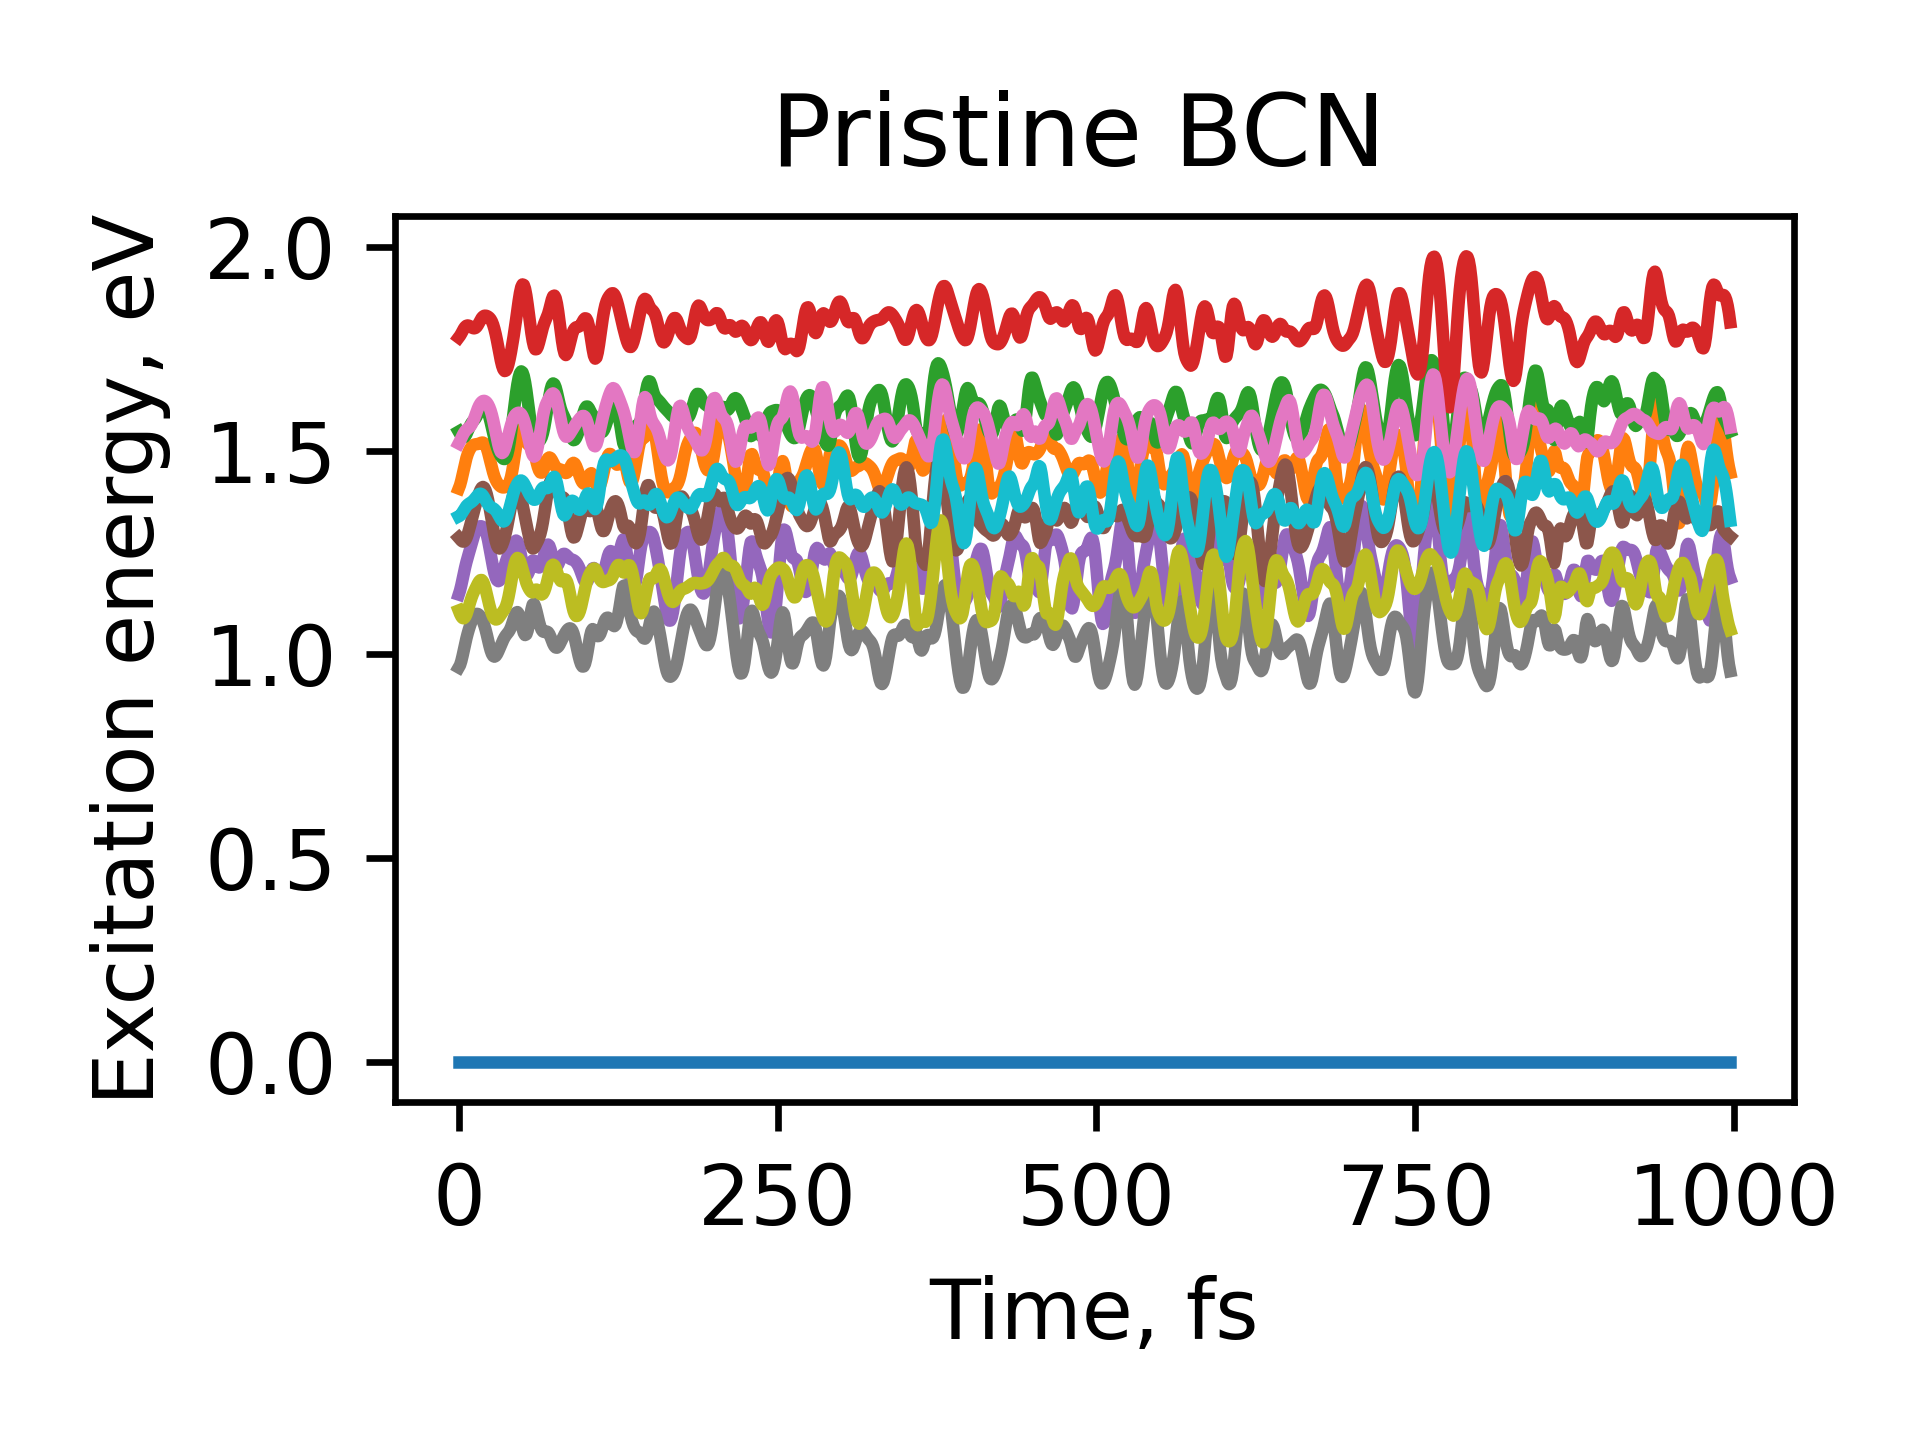

In [6]:
###single particle
%matplotlib notebook
titles = ['Pristine BCN ']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(os.getcwd()+F'/../04-step3-manybody/res-sd-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])
    for i in range(energies.shape[1]):
        plt.plot(md_time, energies[:,i]-energies[:,0])

    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    #plt.ylim(0,1.8)
    plt.tight_layout()
    plt.savefig('./results/BCN sp-Excitation energy.png', dpi=600)
    plt.show()


## sd-electron_only-DFT_Excitation energy

In [ ]:
###single particle
%matplotlib notebook
titles = ['sd-electron_only']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-sd-electron_only-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])

    for i in range(energies.shape[1]):
        #plt.plot(md_time, energies[:,i])
        plt.plot(md_time, energies[:,i]-energies[:,0])

    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sd-electron_only-DFT-Excitation energy.png', dpi=600)
    plt.show()


## ----------

In [ ]:
%matplotlib notebook
titles = ['SP', 'MB' ]
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd', 'ci']):
    plt.subplot(1,2,c+1)
    if c==0:
        energy_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*re*')
    elif c==1:
        energy_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*re*')
    
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    for i in range(energies.shape[1]):
        plt.plot(md_time, energies[:,i]-energies[:,0])
    
    plt.title(titles[c])
    #lt.ylim( [7.5, 11.0] )
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sp--mb-Excitation energy.png', dpi=600)


## sd-hole_only-DFT_Excitation energy

In [ ]:
###single particle
%matplotlib notebook
titles = ['sd-hole_only']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-sd-hole_only-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])

    for i in range(energies.shape[1]):
        #plt.plot(md_time, energies[:,i])
        plt.plot(md_time, energies[:,i]-energies[:,0])

    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sd-hole_only-DFT-Excitation energy.png', dpi=600)
    plt.show()


## sd-electron_cooling-DFT_Excitation energy

In [ ]:
###single particle
%matplotlib notebook
titles = ['sd-electron_cooling']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-sd-electron_cooling-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])

    for i in range(energies.shape[1]):
        #plt.plot(md_time, energies[:,i])
        plt.plot(md_time, energies[:,i])

    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sd-electron_cooling-DFT-Excitation energy.png', dpi=600)
    plt.show()


## sd-hole_cooling-DFT_Excitation energy

In [ ]:
###single particle
%matplotlib notebook
titles = ['sd-hole_cooling']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
for c, basis in enumerate(['sd']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-sd-hole_cooling-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    #print(energies.shape[1])

    for i in range(energies.shape[1]):
        #plt.plot(md_time, energies[:,i])
        plt.plot(md_time, energies[:,i])

    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.tight_layout()
    plt.savefig('./results/sd-hole_cooling-DFT-Excitation energy.png', dpi=600)
    plt.show()


## Mb_Excitation energy

<IPython.core.display.Javascript object>


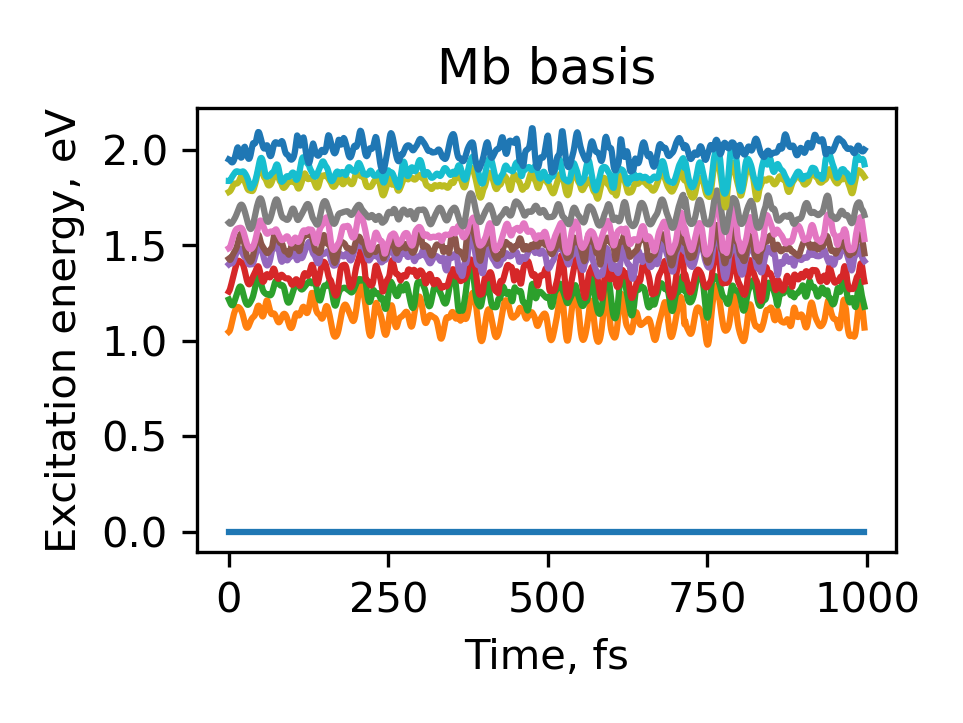

In [12]:
###many_body
%matplotlib notebook
titles = ['Mb basis']
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        
for c, basis in enumerate(['ci']):
    #plt.subplot(1,2,c+1)
    energy_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*re*')
    energy_files = data_io.sort_hvib_file_names(energy_files)
    #print('Sorted energy files are:', energy_files)
    dt = 1.0 # fs
    energies = []
    for file in energy_files:
        energies.append(np.diag(sp.load_npz(file).todense().real))
    energies = np.array(energies)*units.au2ev
    md_time = np.arange(0,energies.shape[0]*dt,dt)
    for i in range(energies.shape[1]):
        plt.plot(md_time, energies[:,i]-energies[:,0])
    
    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    #plt.ylim(0,1.8)
    plt.tight_layout()
    plt.savefig('./results/mb-Excitation energy.png', dpi=600)
    plt.show()


### 4.3. NAC map <a name='nac_map'></a>
Another way of visualizing the NAC values is to plot the average NAC matrix using `plt.imshow`.

## SP-hole_only-NACs map

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

nac_files = glob.glob('res-sd-hole_only-DFT/Hvib_sd*im*')
for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=100)
plt.xlabel('State index')
plt.ylabel('State index')
plt.colorbar().ax.set_title('meV')
plt.title('SP-hole_only-NACs')
plt.tight_layout()
plt.savefig('./results/SP-hole_only-NACs.png', dpi=600)
plt.show()



## SP-electron_only-NACs map

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

nac_files = glob.glob('res-sd-electron_only-DFT/Hvib_sd*im*')
for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=100)
plt.xlabel('State index')
plt.ylabel('State index')
plt.colorbar().ax.set_title('meV')
plt.title('SP-electron_only-NACs')
plt.tight_layout()
plt.savefig('./results/SP-electron_only-NACs.png', dpi=600)
plt.show()



## sp_NAC map

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

nac_files = glob.glob('res-mb-sd-DFT/Hvib_sd*im*')
for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=100)
plt.xlabel('State index')
plt.ylabel('State index')
plt.colorbar().ax.set_title('meV')
plt.title('SP NACs')
plt.tight_layout()
plt.savefig('./results/SP NACs.png', dpi=600)
plt.show()



## MD_NAC map

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        

nac_files = glob.glob('res-mb-sd-DFT/Hvib_ci*im*')
for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=100)
plt.xlabel('State index')
plt.ylabel('State index')
plt.colorbar().ax.set_title('meV')
plt.title('MB NACs')
plt.tight_layout()
plt.savefig('./results/MB NACs.png', dpi=600)
plt.show()

### 4.4. Excitation analysis <a name='exc_anal'></a>
Here, we average the CI coefficients for each TD-DFT excited states over the MD trajectory. This shows the excited states degree of mixing. This code is adopted from [here](https://github.com/AkimovLab/Project_CsPbI3_MB_vs_SP/blob/master/cubic/excitation_analysis/excitation_analysis.py) written by Brendan Smith with some modifications.

We first need to define a dictionary which has exactly the same parameters as in `params_md_sd`. Other parameters that needs to be defined are as follows:

`logfiles`: A list of all log files which is obtained from `glob.glob`.

`nsds`: Number of SDs to be considered for each excited state.

`colors`: The colors which are in order of the SDs. For example, the `green` color is for the first excitation that appears in the excited states analysis section in CP2K log files.

The black lines show the error bars which are computed with a confidence interval coefficient of 1.96 which shows the confidence interval of $95\%$. The error bars are computed as follows:

$$\epsilon=Z\frac{s}{\sqrt{N}}$$

where $Z$ is the confidence interval coefficient, $s$ is the standard deviation of the $c_i^2$ values, and $N$ is the number of samples. We will use this formula over the tutorials for step4 as well.

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
logfiles = glob.glob(F'{params_mb_sd["logfile_directory"]}/*.log')
#print(logfiles)
params = params_mb_sd
nsds = 4
colors = ['cyan','blue','red','purple']
ci_coeffs = []
for logfile in logfiles:
    params.update({"logfile_name": logfile})
    excitation_energies, ci_basis_raw, ci_coefficients_raw_unnorm, spin_components = CP2K_methods.read_cp2k_tddfpt_log_file( params ) 
    ci_coefficients_raw_norm = step2_many_body.normalize_ci_coefficients(ci_coefficients_raw_unnorm)
    for j in range(len(ci_coefficients_raw_norm)):
        for k in range(len(ci_coefficients_raw_norm[j])):
            ci_coefficients_raw_norm[j][k] = ci_coefficients_raw_norm[j][k]**2
    ci_coeffs.append(ci_coefficients_raw_norm)


nsteps = len(ci_coeffs)
nstates = params["number_of_states"]

coeffs = []
coeffs_avg   = []
coeffs_error = []


for state in range(nstates):

    coeffs.append( [] )
    coeffs_avg.append( [] )
    coeffs_error.append( [] )

    for sd in range( nsds ):

        coeffs[state].append( [] )
        coeffs_avg[state].append( [] )
        coeffs_error[state].append( [] )

        for step in range( nsteps ):
            if len( ci_coeffs[step][state] ) < nsds and sd > len( ci_coeffs[step][state] )-1:
                coeffs[state][sd].append( 0.0 )
            else:
                coeffs[state][sd].append( ci_coeffs[step][state][sd] )
     
        mb_coeff_avg, mb_coeff_std = data_stat.scalar_stat( coeffs[state][sd] )
        coeffs_avg[state][sd].append( mb_coeff_avg )
        coeffs_error[state][sd].append( 1.96 * mb_coeff_std / math.sqrt(nsteps) )
  
        plt.plot(     state+1, mb_coeff_avg, color="black", marker='s', markerfacecolor=colors[sd], markeredgewidth=0.4, markersize=7)
        plt.errorbar( state+1, mb_coeff_avg, yerr=coeffs_error[state][sd], linestyle="None", color='black')


# plt.ylim(0,1)
plt.xlabel('State Index')
plt.ylabel('c$_{i}^2$')
plt.tight_layout()
plt.savefig('./results/CI^2.png', dpi=600)
plt.show()

### 4.5. Average partial density of states <a name='ave_pdos'></a>
In this section, we will plot the average partial density of states (pDOS) over the MD trajectory. There are two ways to take the average of the pDOS:

1- Average all the pDOS files and then convolve the average pDOS for each element.
2- Convolve the pDOS files and then take the average for each element.

We choose the first one due to two reasons. First, the computational cost is much lower and we only need one convolution. Second is that averaging over the grid points (using the method 2) is dependent on the number of grid points we use for convolution which again adds to the complexity of the procedure. 

Here, we will use normalized Gaussian function for weighting the pDOS values and summing them.

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

This function is defined in the `gaussian_function` below. To apply this to a vector of numbers and sum all the weighted Gaussians, we use the `gaussian_function_vector` which will be used for pDOS plots.

In [8]:
def gaussian_function(a, mu, sigma, num_points, x_min, x_max):
    pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
    x = np.linspace(x_min, x_max, num_points)
    x_input = np.array((-1/2)/(np.square(sigma))*np.square(x-mu))
    gaussian_fun = pre_fact*np.exp(x_input)
    
    return x, gaussian_fun
    
def gaussian_function_vector(a_vec, mu_vec, sigma, num_points, x_min, x_max):
    for i in range(len(a_vec)):
        if i==0:
            sum_vec = np.zeros(num_points)
        energy_grid, conv_vec = gaussian_function(a_vec[i], mu_vec[i], sigma, num_points, x_min, x_max)
        sum_vec += conv_vec
    return energy_grid, sum_vec


#### 4.5.1. Plot pDOS for all atoms angular momentums <a name='ave_pdos_1'></a>

In this part, we plot the pDOS for all of the angular momentum components of each atom. This is done by using the `orbital_cols`. In fact, the `orbital_cols` is related to `orbitals`. For example, for `s` orbital, we consider the 3rd index and for `p` orbital, we sum the columns from 4 to 6 (`range(4,7)`). Here we want to show how the code works and how the you can modify that based on your project. In the next section, we will show the pDOS only for atoms and sum all the components in each row of the pdos file. Other parameters are as follows:

`atoms`: The atoms names which will be used in the labeling and plotting. The atoms order should be exactly the same as appear in the `.pdos` files. For example, the `*k1*.pdos` files contain the pDOS data for `Ti` atom and `*k2*.pdos` files contain the data for the `O` atom.

`npoints`: The number of grid points for making the Gaussian functions. Note that, this value should be more than the number of states in the `.pdos` files.

`sigma`: The standard deviation in eV.

`shift`: This value shifts the minimum and maximum energy found in the `pdos_ave` and will extend the boundaries from both sides by `shift`eV.

Finally, we will plot the total density of states. Note that the HOMO energy level is set to zero.

<IPython.core.display.Javascript object>


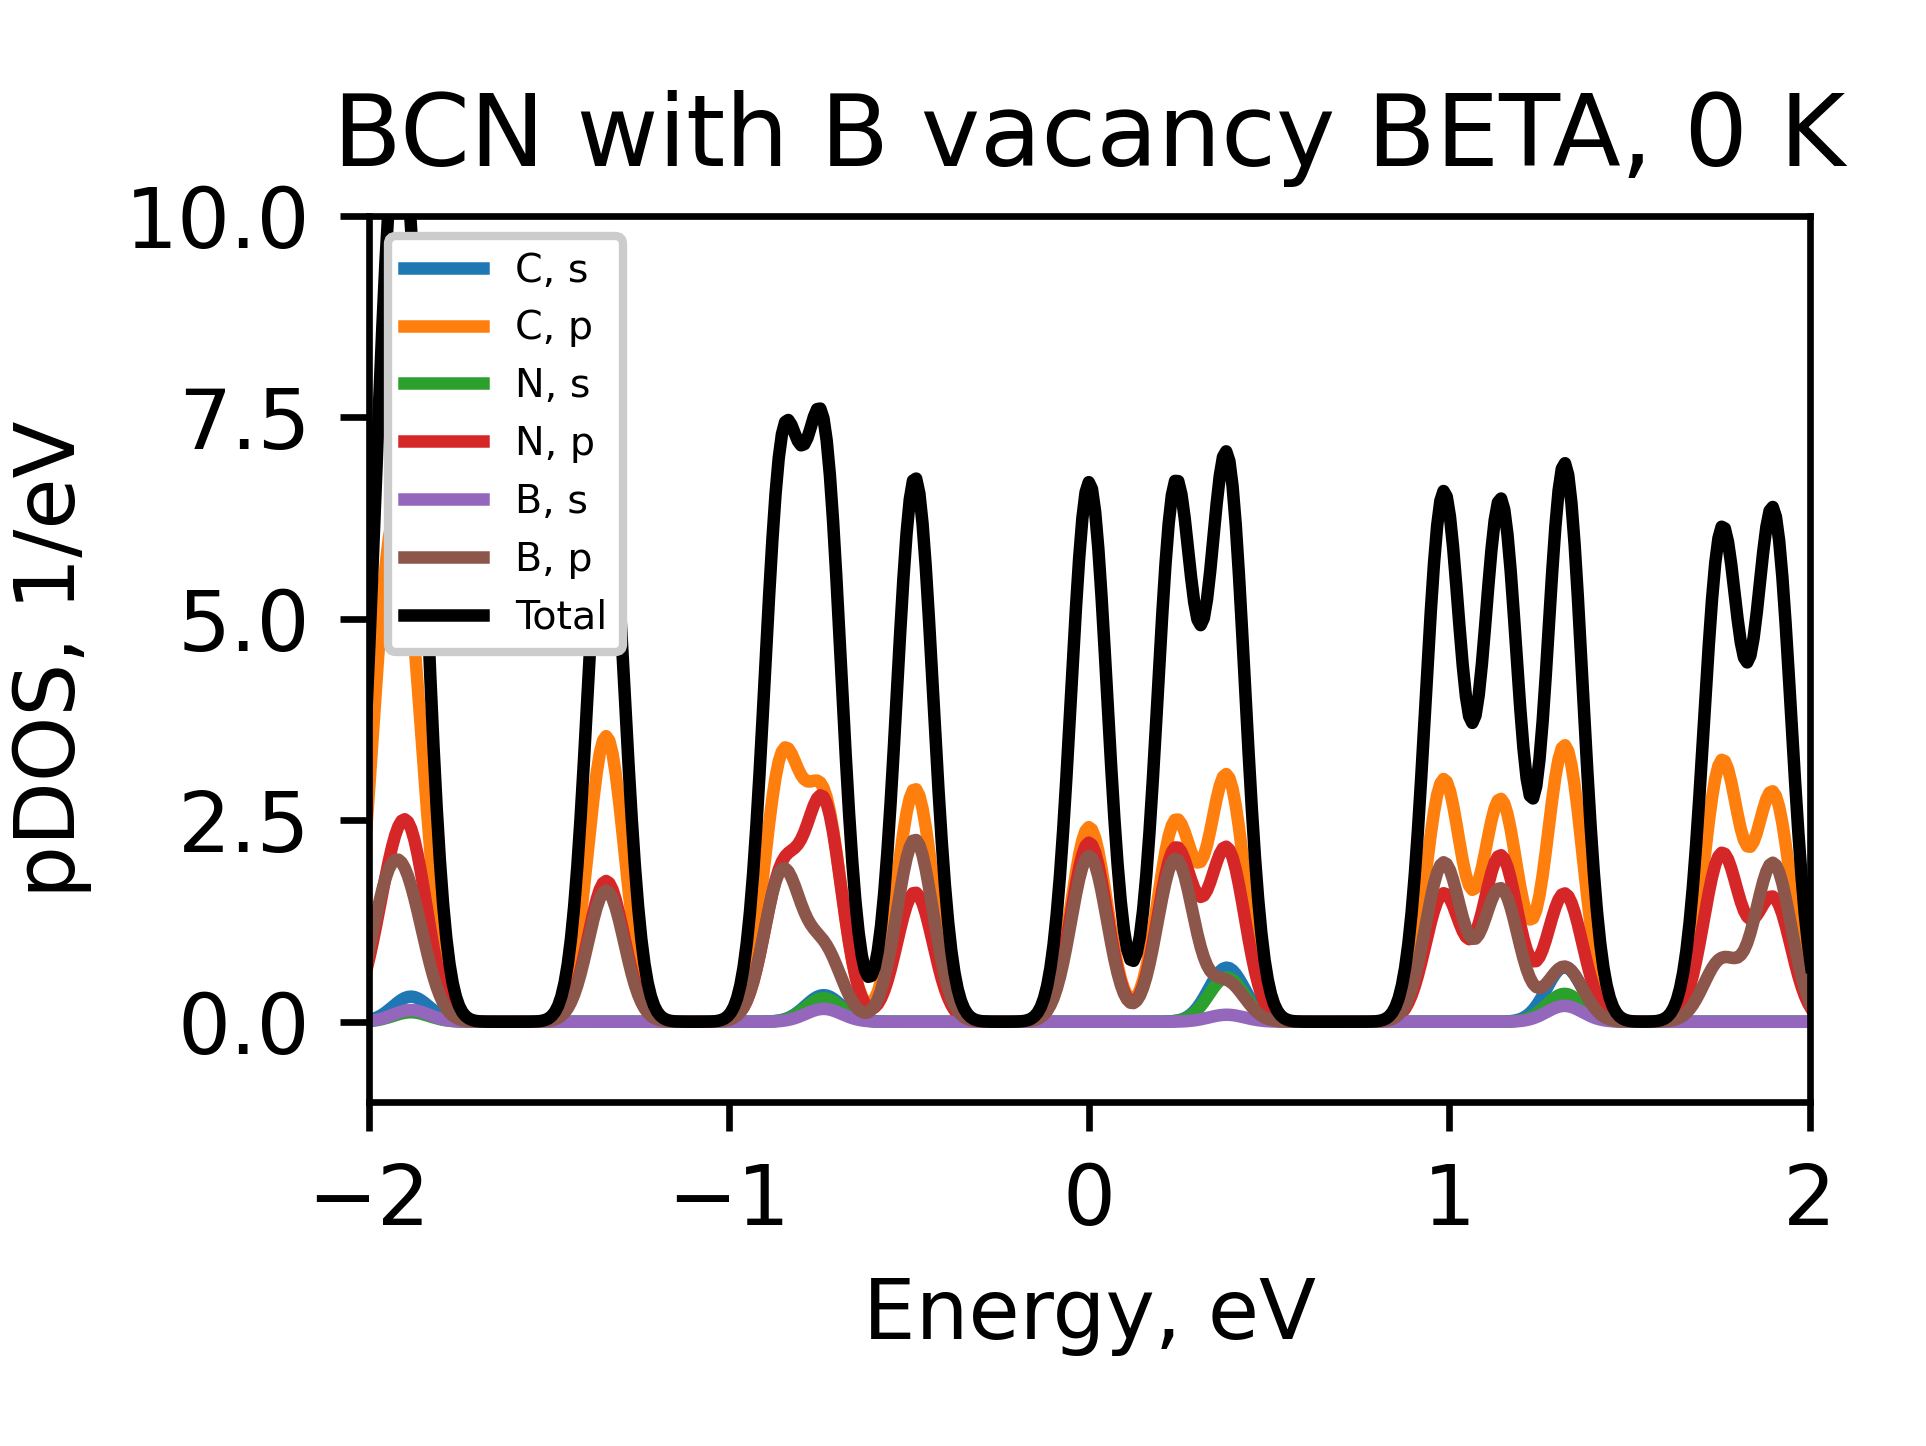

In [14]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
path_to_all_pdos = os.getcwd()+'/../03_step2_cp2k/BCN-V1_N_vacancy-TDDFT-PBE'
atoms = ['C','N','B']
orbitals_cols = [[3], range(4,7)]
orbitals = ['s','p']
npoints = 4000
sigma = 0.05 # eV
shift = 2.0 # eV
ave_pdos_convolved_all = []
for c1,i in enumerate([1,2,3]):
    pdos_files = glob.glob(path_to_all_pdos+F'/*k{i}*.pdos')
    for c2, pdos_file in enumerate(pdos_files):
        pdos_mat = np.loadtxt(pdos_file)
        if c2==0:
            pdos_ave = np.zeros(pdos_mat.shape)
        pdos_ave += pdos_mat
    pdos_ave /= c2+1
    pdos_ave[:,1] *= units.au2ev
    e_min = np.min(pdos_ave[:,1])-shift
    e_max = np.max(pdos_ave[:,1])+shift
    homo_level = np.max(np.where(pdos_ave[:,2]==2.0))
    homo_energy = pdos_ave[:,1][homo_level]
    for c3, orbital_cols in enumerate(orbitals_cols):
        try:
            sum_pdos_ave = np.sum(pdos_ave[:,orbital_cols],axis=1)
            ave_energy_grid, ave_pdos_convolved = gaussian_function_vector(sum_pdos_ave, pdos_ave[:,1], sigma,
                                                                               npoints, e_min, e_max)
            ave_pdos_convolved_all.append(ave_pdos_convolved)
            pdos_label = atoms[c1]+F', {orbitals[c3]}'
            plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved, label=pdos_label)
        except:
            pass


ave_pdos_convolved_total = np.sum(np.array(ave_pdos_convolved_all),axis=0)
plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved_total, color='black', label='Total')
plt.legend(fontsize=4.75, ncol=1, loc='upper left',facecolor='white', framealpha=1)

plt.xlim(-2,2)
plt.ylim(-1,10)

plt.ylabel('pDOS, 1/eV')
plt.xlabel('Energy, eV')
plt.title('BCN with N vacancy, 0 K')
plt.tight_layout()
plt.savefig('./results/ANGULAR-PDOS BCN with N vacancy.png', dpi=600)
plt.show()

#### 4.5.2. Plot pDOS for atoms with no angular momentum component <a name='ave_pdos_2'></a>
As you can see we have removed the `for` loop for the `orbital_cols` and in the `try` section we have set `sum_pdos_ave = np.sum(pdos_ave[:,3::],axis=1)` which will sum all the columns from 3rd index (`pdos_ave[:,3::]`).

In [ ]:
%matplotlib notebook
figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)        
path_to_all_pdos = os.getcwd()+'/../03-step2-manybody/all_pdosfiles'
atoms = ['C', 'N','B']
npoints = 4000
sigma = 0.05
shift = 2.0 # eV
ave_pdos_convolved_all = []
for c1,i in enumerate([1,2,3]):
    pdos_files = glob.glob(path_to_all_pdos+F'/*k{i}*.pdos')
    for c2, pdos_file in enumerate(pdos_files):
        pdos_mat = np.loadtxt(pdos_file)
        if c2==0:
            pdos_ave = np.zeros(pdos_mat.shape)
        pdos_ave += pdos_mat
    pdos_ave /= c2+1
    pdos_ave[:,1] *= units.au2ev
    e_min = np.min(pdos_ave[:,1])-shift
    e_max = np.max(pdos_ave[:,1])+shift
    homo_level = np.max(np.where(pdos_ave[:,2]==2.0))
    homo_energy = pdos_ave[:,1][homo_level]
    try:
        sum_pdos_ave = np.sum(pdos_ave[:,3::],axis=1)
        ave_energy_grid, ave_pdos_convolved = gaussian_function_vector(sum_pdos_ave, pdos_ave[:,1], sigma,
                                                                           npoints, e_min, e_max)
        ave_pdos_convolved_all.append(ave_pdos_convolved)
        pdos_label = atoms[c1]
        plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved, label=pdos_label)
    except:
        pass


ave_pdos_convolved_total = np.sum(np.array(ave_pdos_convolved_all),axis=0)
plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved_total, color='black', label='Total')
plt.legend(fontsize=5.75, ncol=1, loc='upper right')
plt.xlim(-4,4)
plt.ylabel('pDOS, 1/eV')
plt.xlabel('Energy, eV')
plt.title('BCN, 300 K')
plt.tight_layout()
plt.savefig('./results/ATOM-PDOS.png', dpi=600)
plt.show()